# Importing all the essential libraries


In [28]:
from pprint import pprint  # for better readability of data structures
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for creating visualizations
import seaborn as sns  # for statistical data visualization

# Installing Python Reddit API Wrapper (PRAW)


In [29]:
# "praw" is a python package that allows for simple access to Reddit's API
%pip install praw 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Creating a reddit instance


### Notes:

1. Create a reddit account.
2. Create an app on "https://www.reddit.com/prefs/apps".
3. Add "Name", select "script" for personal use and give a "redirect uri". Use "http://localhost:8080" for "redirect_uri".
4. Copy "client_id" and "client_secret" to use it while creating a reddit instance.


In [30]:
import praw

user_agent = "ScraperV1 by /u/aham18113"
reddit = praw.Reddit(
    client_id="uhMuPLWNAVkB-gLeuK-KHA",
    client_secret="i8hFEa-eowj2ALFXjDwRgtJ7hBk23w",
    user_agent=user_agent,
    check_for_async=False,
)

# Creating and saving posts of the "virtualreality" subreddit in a pandas data frame


### Notes:

1. The entries include: <br>
   1.1. Number <br>
   1.2. Id <br>
   1.3. Title <br>
   1.4. Upvotes <br>
   1.5. Upvote Ratio <br>
   1.6. Comments <br>
   1.7. Timestamp <br>
   1.8. Total Votes <br>
   1.9. Downvotes <br>
   1.10. Engagement <br>
2. Set "start_date" and "end_date" with a 3-month difference. <br>
   (or) <br>
   Set "start_date", eg) start_date = "01-11-23 00:00:00" as it has approximately 3-month difference till now.


In [31]:
import datetime  # to create, manipulate, and format dates and times

subreddit = reddit.subreddit("virtualreality")
posts = subreddit.hot(limit=None)  # "limit=None" for maximum posts

posts_dict_vr = {
    "Id": [],
    "Title": [],
    "Upvotes": [],
    "Upvote Ratio": [],
    "Comments": [],
    "Timestamp": [],
}

start_date = "01-11-23 00:00:00"
start_date = datetime.datetime.strptime(
    start_date, "%d-%m-%y %H:%M:%S").timestamp()

# end_date = "01-02-24 00:00:00"
# end_date = datetime.datetime.strptime(end_date, "%d-%m-%y %H:%M:%S").timestamp()

for post in posts:
    date = post.created_utc
    # if start_date <= date <= end_date:
    if start_date <= date:
        posts_dict_vr["Id"].append(post.id)
        posts_dict_vr["Title"].append(post.title)
        posts_dict_vr["Upvotes"].append(post.score)
        posts_dict_vr["Upvote Ratio"].append(post.upvote_ratio)
        posts_dict_vr["Comments"].append(post.num_comments)
        posts_dict_vr["Timestamp"].append(post.created_utc)

# saving the data in a pandas dataframe
posts_dict_vr = pd.DataFrame(posts_dict_vr)

# more metrics
posts_dict_vr["Total Votes"] = posts_dict_vr["Upvotes"] / \
    posts_dict_vr["Upvote Ratio"]
posts_dict_vr["Total Votes"] = posts_dict_vr["Total Votes"].astype(
    int
)  # typecasting from float to int
posts_dict_vr["Downvotes"] = posts_dict_vr["Total Votes"] - \
    posts_dict_vr["Upvotes"]
posts_dict_vr["Engagement"] = posts_dict_vr["Comments"] + \
    posts_dict_vr["Total Votes"]
posts_dict_vr["Number"] = list(range(1, len(posts_dict_vr) + 1))

# Rearranging index for "Number"
last_column = posts_dict_vr.pop("Number")
posts_dict_vr.insert(0, "Number", last_column)

posts_dict_vr["Timestamp"] = pd.to_datetime(
    posts_dict_vr["Timestamp"], unit="s")
# print(posts_dict_vr)
print(posts_dict_vr.to_string())

     Number       Id                                                                                                                                                                                                                                                                                                         Title  Upvotes  Upvote Ratio  Comments           Timestamp  Total Votes  Downvotes  Engagement
0         1  1ahbbp2                                                                                                                                                                                                                                                                                Weekly VR - What Did you Play?        3          0.81        19 2024-02-02 19:01:15            3          0          22
1         2  1amvqvt                                                                                                                                                            

# Generate CSV for subreddit "virtualreality"


In [32]:
df_vr = pd.DataFrame(posts_dict_vr)
df_vr.to_csv(
    "C:/Users/ahamg/OneDrive/Desktop/Reddit/CSV Files/Scrape_vr_final.csv", index=False
)

# Creating and saving posts of the "webdev" subreddit in a pandas data frame


In [33]:
import datetime

subreddit = reddit.subreddit("webdev")
posts = subreddit.hot(limit=None)

posts_dict_wd = {
    "Id": [],
    "Title": [],
    "Upvotes": [],
    "Upvote Ratio": [],
    "Comments": [],
    "Timestamp": [],
}

start_date = "01-11-23 00:00:00"
start_date = datetime.datetime.strptime(
    start_date, "%d-%m-%y %H:%M:%S").timestamp()

# end_date = "01-02-24 00:00:00"
# end_date = datetime.datetime.strptime(end_date, "%d-%m-%y %H:%M:%S").timestamp()

for post in posts:
    date = post.created_utc
    # if start_date <= date <= end_date:
    if start_date <= date:
        posts_dict_wd["Id"].append(post.id)
        posts_dict_wd["Title"].append(post.title)
        posts_dict_wd["Upvotes"].append(post.score)
        posts_dict_wd["Upvote Ratio"].append(post.upvote_ratio)
        posts_dict_wd["Comments"].append(post.num_comments)
        posts_dict_wd["Timestamp"].append(post.created_utc)

posts_dict_wd = pd.DataFrame(posts_dict_wd)

posts_dict_wd["Total Votes"] = posts_dict_wd["Upvotes"] / \
    posts_dict_wd["Upvote Ratio"]
posts_dict_wd["Total Votes"] = posts_dict_wd["Total Votes"].astype(
    int
)  # typecasting from float to int
posts_dict_wd["Downvotes"] = posts_dict_wd["Total Votes"] - \
    posts_dict_wd["Upvotes"]
posts_dict_wd["Engagement"] = posts_dict_wd["Comments"] + \
    posts_dict_wd["Total Votes"]
posts_dict_wd["Number"] = list(range(1, len(posts_dict_wd) + 1))

last_column = posts_dict_wd.pop("Number")
posts_dict_wd.insert(0, "Number", last_column)

posts_dict_wd["Timestamp"] = pd.to_datetime(
    posts_dict_wd["Timestamp"], unit="s")
# print(posts_dict_wd)
print(posts_dict_wd.to_string())

     Number       Id                                                                                                                                                                                                                                                      Title  Upvotes  Upvote Ratio  Comments           Timestamp  Total Votes  Downvotes  Engagement
0         1  1ag9d28                                                                                                                                                                                                            Monthly Getting Started / Web Dev Career Thread       13          0.94        67 2024-02-01 12:00:23           13          0          80
1         2  1aqj9nh                                                                                                                                                                                                   I'm a Web Dev not a master of all programming languages.      2

# Generate CSV for subreddit "webdev"


In [34]:
df_wd = pd.DataFrame(posts_dict_wd)
df_wd.to_csv(
    "C:/Users/ahamg/OneDrive/Desktop/Reddit/CSV Files/Scrape_wd_final.csv", index=False
)

# Plotting graphs for analyzing data from two subreddits


## Line Plot


### Notes:

1. We can use the CSV files for both the subreddits to generate plots. However, for proper analysis of engagement in a particular subreddit, we should use ".head(n)" as the number of posts per subreddit is very large.
2. Engagement = Total Votes + Comments


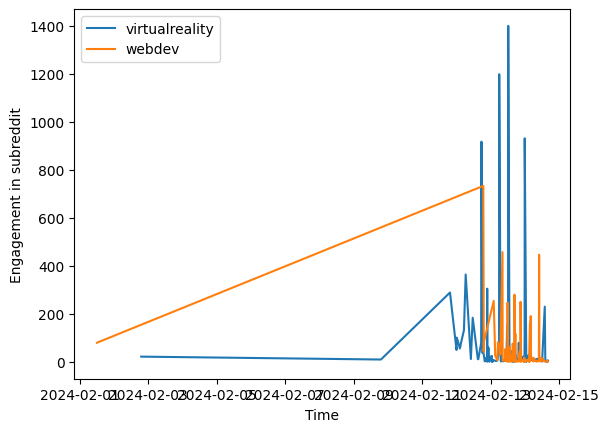

In [35]:
# # data from "virtualreality" subreddit
# data1 = pd.read_csv("C:/Users/ahamg/OneDrive/Desktop/Reddit/Scrape_vr_final.csv")

# # data from "webdev" subreddit
# data2 = pd.read_csv("C:/Users/ahamg/OneDrive/Desktop/Reddit/Scrape_wd_final.csv")

# use ".head(n)" to be able to see the analysis properly as the posts are too many
data1 = posts_dict_vr.head(100)
data2 = posts_dict_wd.head(100)

sns.lineplot(x="Timestamp", y="Engagement", data=data1, label="virtualreality")
sns.lineplot(x="Timestamp", y="Engagement", data=data2, label="webdev")

plt.xlabel("Time")
plt.ylabel("Engagement in subreddit")
plt.legend()

## Kernel Density Estimate (KDE) Plot


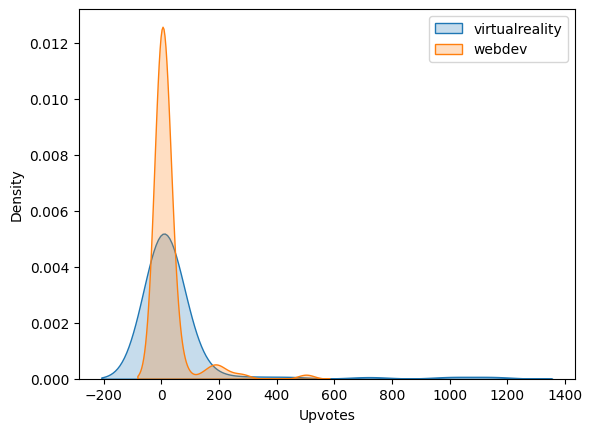

In [36]:
sns.kdeplot(data=data1.Upvotes, fill=True, label="virtualreality")
sns.kdeplot(data=data2.Upvotes, fill=True, label="webdev")

plt.legend()